It is worth noting that this part is similar to part 1 (1_GLT1_GS_graph_stat) and there are practically no comments here

In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, ks_2samp

import matplotlib.ticker as ticker
from statannot import add_stat_annotation

In [2]:
def csv_to_xlsx_clust():
    csv_search_string = 'data2/*Cx43*.csv'
    csv_filepaths = glob.glob(csv_search_string)
    df = pd.DataFrame()
    for csv in csv_filepaths:
        out = csv.split('.')[0]+'.xlsx'
        df = pd.read_csv(csv, sep=';', decimal = ',', encoding='latin1',engine='python')
        df = df.to_excel(out, float_format="%.4f")
    return (df)

In [3]:
#csv_to_xlsx_clust()

In [4]:
def file_extraction(search_string): 
    filepaths = glob.glob(search_string) 
    df = pd.DataFrame()
    col_name_suffix = 1
    for find_files in filepaths:
        df = df.join (pd.read_excel(find_files, usecols=[2,5]), how='outer',lsuffix=col_name_suffix, )
        col_name_suffix +=1 
    return(df)

In [5]:
N1_clust_ctrl = file_extraction('data2/N1*_ctrl_*_Cx43.xlsx')
N2_clust_ctrl = file_extraction('data2/N2*_ctrl_*_Cx43.xlsx')
N3_clust_ctrl = file_extraction('data2/N3*_ctrl_*_Cx43.xlsx')
N4_clust_ctrl = file_extraction('data2/N4*_ctrl_*_Cx43.xlsx')
N5_clust_ctrl = file_extraction('data2/N5*_ctrl_*_Cx43.xlsx')
N6_clust_ctrl = file_extraction('data2/N6*_ctrl_*_Cx43.xlsx') 

N1_clust_SE = file_extraction('**/N1*SE*_Cx43.xlsx')
N2_clust_SE = file_extraction('**/N2*SE*_Cx43.xlsx')
N3_clust_SE = file_extraction('**/N3*SE*_Cx43.xlsx')
#N4_clust_SE = file_extraction('**/N4*SE*_Cx43.xlsx')
N5_clust_SE = file_extraction('**/N5*SE*_Cx43.xlsx')
N6_clust_SE = file_extraction('**/N6*SE*_Cx43.xlsx')

N1_clust_ctrl.head()

,Volume (unit)2,SurfaceArea2,Volume (unit),SurfaceArea
0,0.068,1.193,0.113,2.191
1,0.058,1.066,0.023,0.668
2,0.010,0.314,0.029,0.874
3,0.026,0.730,0.010,0.314
4,0.029,0.690,0.065,1.130


In [6]:
N1_num_clusters, N2_num_clusters, N3_num_clusters, N4_num_clusters, N5_num_clusters, N6_num_clusters = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_num_clusters ['Контроль'] = N1_clust_ctrl.count().iloc[::2]
N2_num_clusters ['Контроль'] = N2_clust_ctrl.count().iloc[::2]
N3_num_clusters ['Контроль'] = N3_clust_ctrl.count().iloc[::2]
N4_num_clusters ['Контроль'] = N4_clust_ctrl.count().iloc[::2]
N5_num_clusters ['Контроль'] = N5_clust_ctrl.count().iloc[::2]
N6_num_clusters ['Контроль'] = N6_clust_ctrl.count().iloc[::2]


N1_SE_num_clusters, N2_SE_num_clusters, N3_SE_num_clusters,  N5_SE_num_clusters, N6_SE_num_clusters = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_SE_num_clusters['ЭС'] = N1_clust_SE.count().iloc[::2]
N2_SE_num_clusters['ЭС'] = N2_clust_SE.count().iloc[::2]
N3_SE_num_clusters['ЭС'] = N3_clust_SE.count().iloc[::2]
N5_SE_num_clusters['ЭС'] = N5_clust_SE.count().iloc[::2]
N6_SE_num_clusters['ЭС'] = N6_clust_SE.count().iloc[::2]

N1_num_clusters

,Контроль
Volume (unit)2,9606
Volume (unit),7675


In [7]:
df_tot_vol = pd.read_excel('data2/total_vol_cx43_s100b.xlsx')
#df_tot_vol.dtypes

In [8]:
values_ctrl = [N1_num_clusters,N2_num_clusters, N3_num_clusters,N4_num_clusters, N5_num_clusters, N6_num_clusters] 
values_SE = [N1_SE_num_clusters,N2_SE_num_clusters, N3_SE_num_clusters, N5_SE_num_clusters,N6_SE_num_clusters] 
clust_num_ctrl, clust_num_SE  = pd.concat(values_ctrl), pd.concat(values_SE)

clust_num_ctrl['Totvol_clust_ctrl'] = df_tot_vol.iloc[:,0].values
clust_num_ctrl ['clusters_per_125_ctrl'] = (clust_num_ctrl['Контроль']*125)/clust_num_ctrl['Totvol_clust_ctrl']

clust_num_SE['Totvol_clust_SE'] = df_tot_vol.iloc[:len(clust_num_SE),1].values
clust_num_SE ['clusters_per_125_SE'] = (clust_num_SE['ЭС']*125)/clust_num_SE['Totvol_clust_SE']

all_clust_num,all_clust_num2  = pd.DataFrame(), pd.DataFrame()
all_clust_num ['Контроль'] = clust_num_ctrl.iloc[:,2].values
all_clust_num2 ['ЭС'] = clust_num_SE.iloc[:,2].values

all_clust_num.drop(all_clust_num [all_clust_num ['Контроль']> 40].index, inplace=True)#удалим выбросы

all_clust_num = all_clust_num.join(all_clust_num2, how='outer')
all_clust_num

,Контроль,ЭС
0,NaN,21.834757
1,NaN,13.867601
2,NaN,23.770283
3,NaN,33.454836
4,NaN,27.018562
5,NaN,62.175498
6,36.886535,30.714912
7,14.382940,42.720726
8,31.938670,46.175558
9,NaN,34.885367


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=6.696e-04 U_stat=2.400e+01


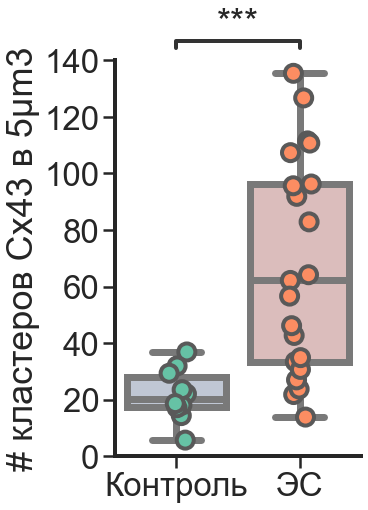

In [9]:
def boxplot_graph(data, dots, fig_name, big_tick, ylim): 
    plt.figure(figsize=(6,8)) # меняет размер графика
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(font_scale=1.5, style="ticks",context="poster", rc= custom_params)
    plot = sns.boxplot(data = data, palette="vlag", fliersize = 0, linewidth = 7)
    plot.set_ylabel(fig_name)
    plot.spines['left'].set_linewidth(4)
    plot.spines['bottom'].set_linewidth(4)
    plot.yaxis.set_major_locator(ticker.MultipleLocator(big_tick))
    plt.ylim(ylim)
    add_stat_annotation(plot, data=data,
                    box_pairs=[("Контроль", "ЭС")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=1, comparisons_correction=None, linewidth=4)
    fig_name = 'figs/Cx43_s100b/' + fig_name + '.tif'
    plot = plot.get_figure()
    plt.tight_layout() 
    if dots == True:
        sns.stripplot(data=data,
              size=17, linewidth=4,palette = "Set2", jitter = True)
    plot.savefig(fig_name, dpi=1200)
boxplot_graph(all_clust_num, dots = True, fig_name = '# кластеров Cx43 в 5µm3',big_tick = 20, ylim = [0, 140])

In [10]:
percentile_num_clusters = all_clust_num.quantile([0.25, 0.50 , 0.75])
print(percentile_num_clusters)
stat_clust_num, p_clust_num = mannwhitneyu(all_clust_num.iloc[:, 0].dropna(), all_clust_num.iloc[:, 1].dropna())
print('Statistics=%.3f, p=%.8f' % (stat_clust_num, p_clust_num))

       Контроль         ЭС
0.25  17.409391  33.454836
0.50  20.350873  62.175498
0.75  27.908281  96.268554
Statistics=24.000, p=0.00066957


In [11]:
vol_clust_ctrl = pd.concat([N1_clust_ctrl.iloc[:,::2],N2_clust_ctrl.iloc[:,::2], N3_clust_ctrl.iloc[:,::2], N4_clust_ctrl.iloc[:,::2], N5_clust_ctrl.iloc[:,::2], N6_clust_ctrl.iloc[:,::2]], axis=1, ignore_index=True)
vol_clust_SE = pd.concat([N1_clust_SE.iloc[:,::2],N2_clust_SE.iloc[:,::2], N3_clust_SE.iloc[:,::2], N5_clust_SE.iloc[:,::2], N6_clust_SE.iloc[:,::2]], axis=1, ignore_index=True)

def one_col_stack (dataset):
    df = pd.DataFrame()
    for i in range(dataset.shape[1]):
        df = pd.concat([df, pd.Series(dataset.iloc[:,i].values)],axis=0)
    return(df)

vol_clust_ctrl= one_col_stack (vol_clust_ctrl)
vol_clust_SE = one_col_stack (vol_clust_SE)

vol_clust_ctrl.reset_index(inplace=True, drop=True)
vol_clust_SE.reset_index(inplace=True, drop=True)

all_vol_clust = pd.DataFrame()

all_vol_clust = vol_clust_ctrl.copy()
all_vol_clust = all_vol_clust.join(vol_clust_SE, how='outer',lsuffix = '_CTRL', rsuffix= '_SE')
all_vol_clust.rename(columns = {'0_CTRL' : 'Контроль', '0_SE' : 'ЭС'}, inplace = True)

all_vol_clust.loc[all_vol_clust['Контроль'].isnull()] = 0
all_vol_clust.loc[all_vol_clust['ЭС'].isnull()] = 0
all_vol_clust.sort_values(by=['Контроль', 'ЭС'], ascending=True, inplace=True)
all_vol_clust.drop(all_vol_clust[all_vol_clust['Контроль'] == 0].index, inplace=True)
all_vol_clust.drop(all_vol_clust[all_vol_clust['Контроль']> 0.75].index, inplace=True)#удалим выбросы
all_vol_clust.drop(all_vol_clust[all_vol_clust['ЭС']> 0.75].index, inplace=True)#удалим выбросы
all_vol_clust = all_vol_clust.reset_index(drop=True)

In [12]:
percentile_vol_clusters = all_vol_clust.quantile([0.25, 0.50 , 0.75])
print(percentile_vol_clusters)
stat_vol_clust, p_vol_clust = mannwhitneyu(all_vol_clust.iloc[:, 0], all_vol_clust.iloc[:, 1])
print('Statistics=%.3f, p=%.10f' % (stat_vol_clust, p_vol_clust))

      Контроль     ЭС
0.25     0.045  0.036
0.50     0.100  0.078
0.75     0.187  0.158
Statistics=483068847.000, p=0.0000000000


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=1.218e-126 U_stat=4.831e+08


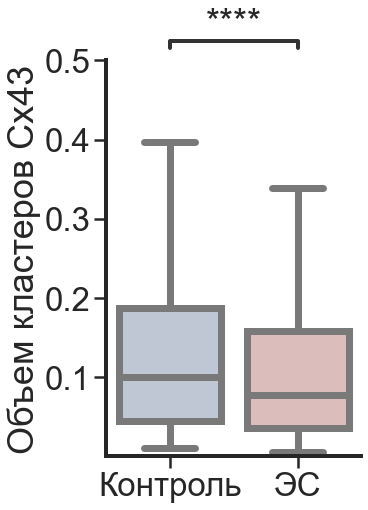

In [13]:
boxplot_graph(all_vol_clust , dots = False, fig_name = 'Объем кластеров Cx43', big_tick = 0.10, ylim = [0.000001, 0.5])

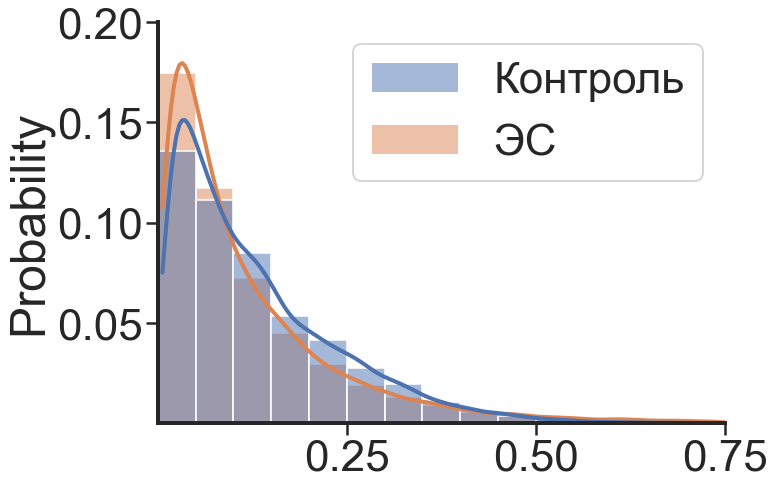

In [14]:
plt.figure(figsize=(12, 8)) # меняет размер графика
sns.set_theme(font_scale=2, style="ticks",context="poster")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
fg = sns.histplot(all_vol_clust,stat='probability',binwidth= 0.05, kde = True, binrange= [0,2],line_kws=dict(linewidth=4))
sns.despine()
fg.spines['left'].set_linewidth(4)
fg.spines['bottom'].set_linewidth(4)
fg.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
fg.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.ylim([0.0001, 0.2])
plt.xlim([0.0001, 0.75])
plt.tight_layout() 

plt.savefig('figs/Cx43_s100b/вероятностное распределение кластеров Cx43 с разным объемом.tiff')

In [15]:
stat_ks_test, p_ks_test = ks_2samp(all_vol_clust.iloc[:, 0], all_vol_clust.iloc[:, 1])
print('Statistics=%.3f, p=%.20f' % (stat_ks_test, p_ks_test))

Statistics=0.092, p=0.00000000000000000000


In [16]:
N1_ctrl_vf_clust, N2_ctrl_vf_clust, N3_ctrl_vf_clust, N4_ctrl_vf_clust, N5_ctrl_vf_clust, N6_ctrl_vf_clust = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

#N1_clust_ctrl.drop(N1_clust_ctrl[N1_clust_ctrl.iloc[:, 2]> 5000].index, inplace=True) #удалим выбросы

N1_ctrl_vf_clust ['Контроль'] = N1_clust_ctrl.sum().iloc[::2]
N2_ctrl_vf_clust ['Контроль'] = N2_clust_ctrl.sum().iloc[::2]
N3_ctrl_vf_clust ['Контроль'] = N3_clust_ctrl.sum().iloc[::2]
N4_ctrl_vf_clust ['Контроль'] = N4_clust_ctrl.sum().iloc[::2]
N5_ctrl_vf_clust ['Контроль'] = N5_clust_ctrl.sum().iloc[::2]
N6_ctrl_vf_clust ['Контроль'] = N6_clust_ctrl.sum().iloc[::2]

N1_SE_vf_clust, N2_SE_vf_clust, N3_SE_vf_clust, N5_SE_vf_clust, N6_SE_vf_clust = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

N1_SE_vf_clust['ЭС'] = N1_clust_SE.sum().iloc[::2]
N2_SE_vf_clust['ЭС'] = N2_clust_SE.sum().iloc[::2]
N3_SE_vf_clust['ЭС'] = N3_clust_SE.sum().iloc[::2]
N5_SE_vf_clust['ЭС'] = N5_clust_SE.sum().iloc[::2]
N6_SE_vf_clust['ЭС'] = N6_clust_SE.sum().iloc[::2]

vf_ctrl_clust_l = [N1_ctrl_vf_clust, N2_ctrl_vf_clust, N3_ctrl_vf_clust, N4_ctrl_vf_clust, N5_ctrl_vf_clust, N6_ctrl_vf_clust]
vvf_SE_clust_l = [N1_SE_vf_clust, N2_SE_vf_clust, N3_SE_vf_clust,  N5_SE_vf_clust, N6_SE_vf_clust]

all_vf_clust_ctrl = pd.concat(vf_ctrl_clust_l)
all_vf_clust_SE = pd.concat(vvf_SE_clust_l)

In [17]:
all_clust_vf = pd.DataFrame()
all_clust_vf['Контроль'] = all_vf_clust_ctrl.iloc[:,0].values/df_tot_vol.iloc[:,0].values
all_clust_vf.drop(all_clust_vf[all_clust_vf['Контроль']> 0.35].index, inplace=True)#удалим выбросы

all_clust_vf= all_clust_vf.join(pd.DataFrame(all_vf_clust_SE.iloc[:,0].values/df_tot_vol.iloc[:len(all_vf_clust_SE),1].values), how='outer')
all_clust_vf.rename(columns = {0 : 'ЭС'}, inplace = True)

In [18]:
percentile_vf_clust = all_clust_vf.quantile([0.25, 0.50 , 0.75])
print(percentile_vf_clust)
stat_vf_clust, p_vf_clust = mannwhitneyu(all_clust_vf.iloc[:, 0].dropna(), all_clust_vf.iloc[:, 1].dropna())
print('Statistics=%.3f, p=%.3f' % (stat_vf_clust, p_vf_clust))

      Контроль        ЭС
0.25  0.012137  0.018059
0.50  0.024101  0.055445
0.75  0.093517  0.111851
Statistics=179.000, p=0.145


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=1.452e-01 U_stat=1.790e+02


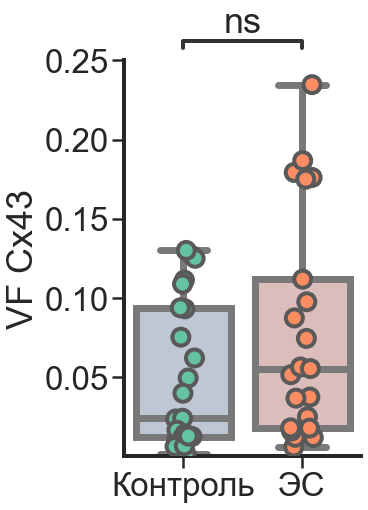

In [19]:
boxplot_graph(all_clust_vf , dots = True, fig_name = 'VF Cx43', big_tick = 0.05, ylim = [0.0001, 0.25])

In [20]:
N1_ctrl_surf_clust, N2_ctrl_surf_clust, N3_ctrl_surf_clust, N4_ctrl_surf_clust, N5_ctrl_surf_clust, N6_ctrl_surf_clust = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_ctrl_surf_clust = N1_clust_ctrl.median().iloc[1::2]
N2_ctrl_surf_clust = N2_clust_ctrl.median().iloc[1::2]
N3_ctrl_surf_clust = N3_clust_ctrl.median().iloc[1::2]
N4_ctrl_surf_clust = N4_clust_ctrl.median().iloc[1::2]
N5_ctrl_surf_clust = N5_clust_ctrl.median().iloc[1::2]
N6_ctrl_surf_clust = N6_clust_ctrl.median().iloc[1::2]

N1_SE_surf_clust, N2_SE_surf_clust, N3_SE_surf_clust, N5_SE_surf_clust, N6_SE_surf_clust  =  pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_SE_surf_clust = N1_clust_SE.median().iloc[1::2]
N2_SE_surf_clust = N2_clust_SE.median().iloc[1::2]
N3_SE_surf_clust = N3_clust_SE.median().iloc[1::2]
N5_SE_surf_clust = N5_clust_SE.median().iloc[1::2]
N6_SE_surf_clust = N6_clust_SE.median().iloc[1::2]

full_vol_ctrl_clust_l = [N1_ctrl_surf_clust, N2_ctrl_surf_clust, N3_ctrl_surf_clust, N4_ctrl_surf_clust, N5_ctrl_surf_clust, N6_ctrl_surf_clust]
full_vol_SE_clust_l = [N1_SE_surf_clust, N2_SE_surf_clust, N3_SE_surf_clust, N5_SE_surf_clust, N6_SE_surf_clust ]

all_surf_clust_ctrl = pd.concat(full_vol_ctrl_clust_l)
all_surf_clust_SE = pd.concat(full_vol_SE_clust_l)

all_surf_clust = pd.DataFrame()
all_surf_clust ['Контроль'] = (all_surf_clust_ctrl.values/df_tot_vol.iloc[:,0].values)*100
all_surf_clust= all_surf_clust.join(pd.DataFrame((all_surf_clust_SE.values/(df_tot_vol.iloc[:len(df_tot_vol),1]).dropna().values)*100), how='outer')
all_surf_clust.rename(columns = {0 : 'ЭС'}, inplace = True)

In [21]:
percentile_surf_clust = all_surf_clust.quantile([0.25, 0.50 , 0.75])
print(percentile_surf_clust)
stat_surf_clust, p_surf_clust = mannwhitneyu(all_surf_clust.iloc[:, 0], all_surf_clust.iloc[:, 1].dropna())
print('Statistics=%.3f, p=%.3f' % (stat_surf_clust, p_surf_clust))

      Контроль        ЭС
0.25  0.009266  0.011369
0.50  0.011460  0.016476
0.75  0.015815  0.028357
Statistics=158.000, p=0.033


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=8.857e-03 U_stat=1.220e+02


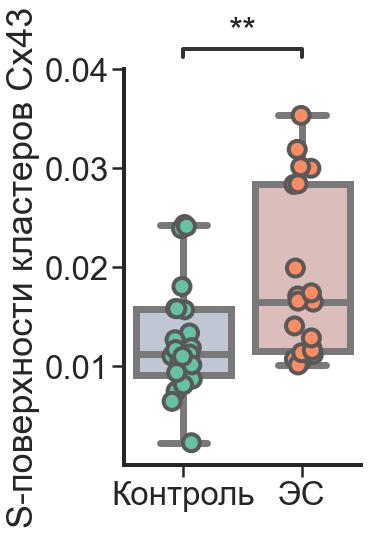

In [22]:
all_surf_clust.drop(all_surf_clust[all_surf_clust['Контроль']> 0.03].index, inplace=True)# удалим выбросы

boxplot_graph(all_surf_clust, dots = True, fig_name= 'S-поверхности кластеров Cx43', big_tick = 0.01, ylim = [0.00001, 0.04])

In [23]:
svr = pd.DataFrame((all_surf_clust_ctrl.iloc[:1].values/all_vf_clust_ctrl.values) * 100)
svr.rename(columns= {0: 'Контроль'}, inplace = True)

svr = svr.join(pd.DataFrame((all_surf_clust_SE.iloc[:1].values/all_vf_clust_SE.values) * 100))
svr.rename(columns= {0: 'ЭС'}, inplace = True)
svr.drop(svr[svr['ЭС']> 2].index, inplace=True)#удалим выбросы

In [24]:
percentile_svr = svr.quantile([0.25, 0.50 , 0.75])
print(percentile_svr)
stat_svr, p_svr = mannwhitneyu(svr.iloc[:, 0], svr.iloc[:, 1].dropna())
print('Statistics=%.3f, p=%.6f' % (stat_svr, p_svr))

      Контроль        ЭС
0.25  0.132535  0.133064
0.50  0.556541  0.294843
0.75  1.151027  0.723650
Statistics=279.000, p=0.237627


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=2.376e-01 U_stat=2.790e+02


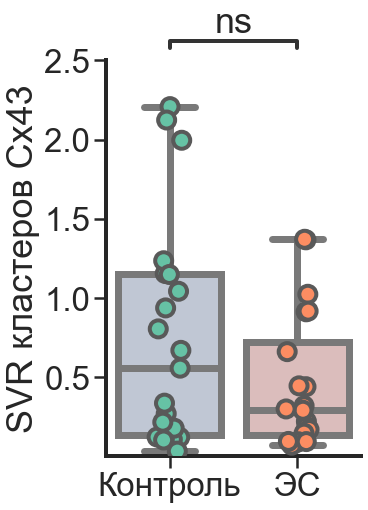

In [25]:
boxplot_graph(svr, dots = True, fig_name= 'SVR кластеров Cx43', big_tick = 0.5, ylim = [0.0001, 2.5])

In [26]:
def csv_to_xlsx_cell():
    csv_search_string = 'data2/*s100b*.csv'
    csv_filepaths = glob.glob(csv_search_string)
    df = pd.DataFrame()
    for csv in csv_filepaths:
        out = csv.split('.')[0]+'.xlsx'
        df = pd.read_csv(csv, sep=',', decimal = '.', encoding='latin1',engine='python')
        df = df.to_excel(out, float_format="%.4f")
    return (df)
#csv_to_xlsx_cell()

In [27]:
N1_cell_vol_ctrl = file_extraction('**/N1*_ctrl_*_s100b.xlsx').sum().iloc[::2]
N2_cell_vol_ctrl = file_extraction('**/N2*_ctrl_*_s100b.xlsx').sum().iloc[::2]
N3_cell_vol_ctrl = file_extraction('**/N3*_ctrl_*_s100b.xlsx').sum().iloc[::2]
N4_cell_vol_ctrl = file_extraction('**/N4*_ctrl_*_s100b.xlsx').sum().iloc[::2]
N5_cell_vol_ctrl = file_extraction('**/N5*_ctrl_*_s100b.xlsx').sum().iloc[::2]
N6_cell_vol_ctrl = file_extraction('**/N6*_ctrl_*_s100b.xlsx').sum().iloc[::2]

N1_cell_vol_SE = file_extraction('**/N1*SE*_s100b.xlsx').sum().iloc[::2]
N2_cell_vol_SE = file_extraction('**/N2*SE*_s100b.xlsx').sum().iloc[::2]
N3_cell_vol_SE = file_extraction('**/N3*SE*_s100b.xlsx').sum().iloc[::2]
N5_cell_vol_SE = file_extraction('**/N5*SE*_s100b.xlsx').sum().iloc[::2]
N6_cell_vol_SE = file_extraction('**/N6*SE*_s100b.xlsx').sum().iloc[::2]

In [28]:
all_cell_vol_ctrl = pd.concat([N1_cell_vol_ctrl,N2_cell_vol_ctrl,N3_cell_vol_ctrl,N4_cell_vol_ctrl, N5_cell_vol_ctrl, N6_cell_vol_ctrl ])
all_cell_vol_SE = pd.concat([N1_cell_vol_SE,N2_cell_vol_SE,N3_cell_vol_SE,N5_cell_vol_SE,N6_cell_vol_SE])

all_cell_vol = pd.DataFrame()
all_cell_vol ['Контроль'] = (all_cell_vol_ctrl/df_tot_vol.iloc[:, 2].values)
all_cell_vol.reset_index(inplace=True, drop=True)
all_cell_vol = all_cell_vol.join(pd.DataFrame((all_cell_vol_SE.values/df_tot_vol.iloc[:, 3].dropna().values)), how= 'outer')
all_cell_vol.rename(columns = {0 : 'ЭС'}, inplace = True)

#all_cell_vol.drop(all_cell_vol[all_cell_vol['ЭС']> 0.5].index, inplace=True)#удалим выбросы

In [29]:
percentile_cell_vol = all_cell_vol.quantile([0.25, 0.50 , 0.75])
print(percentile_cell_vol)
stat_cell_vol, p_cell_vol = mannwhitneyu(all_cell_vol.iloc[:, 0], all_cell_vol.iloc[:, 1].dropna())
print('Statistics=%.3f, p=%.4f' % (stat_cell_vol, p_cell_vol))

      Контроль        ЭС
0.25  0.384737  0.329704
0.50  0.531788  0.599443
0.75  0.654768  0.669118
Statistics=255.000, p=0.9546


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=9.546e-01 U_stat=2.550e+02


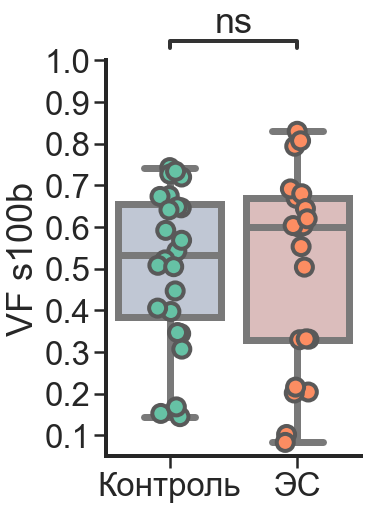

In [30]:
boxplot_graph(all_cell_vol, dots = True, fig_name= 'VF s100b', big_tick = 0.1, ylim = [0.05, 1])

In [31]:
def df_perc_stack (df_list,name_list):
    df = pd.DataFrame()
    
    for i in range (len(name_list)):
        name_id = name_list[i]
        index = pd.MultiIndex.from_product([[name_id ], [0.25, 0.50, 0.75]], 
                                                    names = ['Type', 'Percintile'])
        if i==0:
            df = pd.DataFrame(index=index, data=df_list[0].values,
                                            columns=['Контроль','ЭС'])
        else:
            df = pd.concat([df, pd.DataFrame(index=index, data=df_list[i].values,
                                            columns=['Контроль','ЭС'])])
    return df

perc_list = [percentile_cell_vol, percentile_num_clusters, percentile_surf_clust, percentile_svr, percentile_vf_clust, percentile_vol_clusters ]
perc_name_list = ['gs_vol','num_clust', 'surf_clust', 'svr', 'vf_clust', 'vol_clusters']

perc_table_final = df_perc_stack (perc_list,perc_name_list)

In [32]:
def df_stat_stack(df_p_list, df_stat_list, name_list):
    df = pd.DataFrame()
    for i in range (len(name_list)):
        name_id = name_list[i]
        index = pd.MultiIndex.from_product([[name_id ],['P-val', 'MW(U)']], 
                                                    names = ['Type', 'Stats'])
        if i==0:
            df = pd.DataFrame(index=index, data=[df_p_list[0], df_stat_list[0]],
                                            columns=['Value'])
        else:
            df = pd.concat([df, pd.DataFrame(index=index, data=[df_p_list[i], df_stat_list[i]],
                                            columns=['Value'])])
    return(df)

df_p_list = [p_cell_vol, p_clust_num, p_ks_test, p_surf_clust, p_svr, p_vf_clust, p_vol_clust]
name_p_list = ['p_cell_vol', 'p_clust_num',  'p_ks_test', 'p_surf_clust', 'p_svr', 'p_vf_clust', 'p_vol_clust']
df_stat_list = [stat_cell_vol, stat_clust_num, stat_ks_test,   stat_surf_clust, stat_svr, stat_vf_clust, stat_vol_clust]

stat_table_final = df_stat_stack(df_p_list,df_stat_list, name_p_list)

In [33]:
stat_table_final

Value
Type         Stats               
p_cell_vol   P-val   9.546432e-01
             MW(U)   2.550000e+02
p_clust_num  P-val   6.695687e-04
             MW(U)   2.400000e+01
p_ks_test    P-val  1.936423e-109
             MW(U)   9.222098e-02
p_surf_clust P-val   3.340358e-02
             MW(U)   1.580000e+02
p_svr        P-val   2.376273e-01
             MW(U)   2.790000e+02
p_vf_clust   P-val   1.451692e-01
             MW(U)   1.790000e+02
p_vol_clust  P-val  1.218132e-126
             MW(U)   4.830688e+08

In [35]:
with pd.ExcelWriter('output_table/final_out_s100b_cx43.xlsx') as writer:  
    perc_table_final.to_excel(writer, sheet_name='Percentiles', float_format="%.3f")
    stat_table_final.to_excel(writer, sheet_name='P-val, MW(U)', float_format="%.9f")